## Predictors of Bivalent Vaccine Uptake at the County Level

In this notebook, we look at the avaialability of vaccination clinics and compare it COVID bivalent vaccine uptake within each of the U.S. counties.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
date_list = ["02/01/2023"]
year_list = [2020]

In [3]:
states_list = [
    "AL",
    #"AK",
    "AZ",
    "AR",
    "CA",
    "CO",
    "CT",
    "DE",
    "FL",
    "GA",
    #"HI",
    "ID",
    "IL",
    "IN",
    "IA",
    "KS",
    "KY",
    "LA",
    "ME",
    "MD",
    "MA",
    "MI",
    "MN",
    "MS",
    "MO",
    "MT",
    "NE",
    "NV",
    "NH",
    "NJ",
    "NM",
    "NY",
    "NC",
    "ND",
    "OH",
    "OK",
    "OR",
    "PA",
    "RI",
    "SC",
    "SD",
    "TN",
    "TX",
    "UT",
    "VT",
    "VA",
    "WA",
    "WV",
    "WI",
    "WY",
]

In [4]:
fips_to_state = {
    "01": "AL",
    "02": "AK",
    "04": "AZ",
    "05": "AR",
    "06": "CA",
    "08": "CO",
    "09": "CT",
    "10": "DE",
    "11": "DC",
    "12": "FL",
    "13": "GA",
    "15": "HI",
    "16": "ID",
    "17": "IL",
    "18": "IN",
    "19": "IA",
    "20": "KS",
    "21": "KY",
    "22": "LA",
    "23": "ME",
    "24": "MD",
    "25": "MA",
    "26": "MI",
    "27": "MN",
    "28": "MS",
    "29": "MO",
    "30": "MT",
    "31": "NE",
    "32": "NV",
    "33": "NH",
    "34": "NJ",
    "35": "NM",
    "36": "NY",
    "37": "NC",
    "38": "ND",
    "39": "OH",
    "40": "OK",
    "41": "OR",
    "42": "PA",
    "44": "RI",
    "45": "SC",
    "46": "SD",
    "47": "TN",
    "48": "TX",
    "49": "UT",
    "50": "VT",
    "51": "VA",
    "53": "WA",
    "54": "WV",
    "55": "WI",
    "56": "WY",
}

In [5]:
states_to_abv = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "District of Columbia": "DC",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
}

In [6]:
ipums_to_demo = {
    "COUNTY": "county",
    "STATE": "state",
    "ALT0E001": "total_age",
    "ALT0E002": "male",
    "ALT0E003": "male_under_5",
    "ALT0E004": "male_5_to_9",
    "ALT0E005": "male_10_to_14",
    "ALT0E006": "male_15_to_17",
    "ALT0E007": "male_18_and_19",
    "ALT0E008": "male_20",
    "ALT0E009": "male_21",
    "ALT0E010": "male_22_to_24",
    "ALT0E011": "male_25_to_29",
    "ALT0E012": "male_30_to_34",
    "ALT0E013": "male_35_to_39",
    "ALT0E014": "male_40_to_44",
    "ALT0E015": "male_45_to_49",
    "ALT0E016": "male_50_to_54",
    "ALT0E017": "male_55_to_59",
    "ALT0E018": "male_60_and_61",
    "ALT0E019": "male_62_to_64",
    "ALT0E020": "male_65_and_66",
    "ALT0E021": "male_67_to_69",
    "ALT0E022": "male_70_to_74",
    "ALT0E023": "male_75_to_79",
    "ALT0E024": "male_80_to_84",
    "ALT0E025": "male_85_years_and_over",
    "ALT0E026": "female",
    "ALT0E027": "female_under_5",
    "ALT0E028": "female_5_to 9",
    "ALT0E029": "female_10_to 14",
    "ALT0E030": "female_15_to 17",
    "ALT0E031": "female_18_and 19",
    "ALT0E032": "female_20",
    "ALT0E033": "female_21",
    "ALT0E034": "female_22_to_24",
    "ALT0E035": "female_25_to_29",
    "ALT0E036": "female_30_to_34",
    "ALT0E037": "female_35_to_39",
    "ALT0E038": "female_40_to_44",
    "ALT0E039": "female_45_to_49",
    "ALT0E040": "female_50_to_54",
    "ALT0E041": "female_55_to_59",
    "ALT0E042": "female_60_and_61",
    "ALT0E043": "female_62_to_64",
    "ALT0E044": "female_65_and_66",
    "ALT0E045": "female_67_to_69",
    "ALT0E046": "female_70_to_74",
    "ALT0E047": "female_75_to_79",
    "ALT0E048": "female_80_to_84",
    "ALT0E049": "female_85_years_and_over",
    "ALUCE001": "total_race",
    "ALUCE002": "white_alone",
    "ALUCE003": "black_or_african_american_alone",
    "ALUCE004": "american_indian_and_alaska_native_alone",
    "ALUCE005": "asian_alone",
    "ALUCE006": "native_hawaiian_and_other_pacific_islander_alone",
    "ALUCE007": "some_other_race_alone",
    "ALUCE008": "two_or_more_races",
    "ALUCE009": "two_or_more_races_two_races_including_some_other_race",
    "ALUCE010": "two or more races_two_races_excluding_some_other_race_and_three_or_more_races",
    "ALWGE001": "total_education",
    "ALWGE002": "no_schooling_completed",
    "ALWGE003": "nursery_school",
    "ALWGE004": "kindergarten",
    "ALWGE005": "1st_grade",
    "ALWGE006": "2nd_grade",
    "ALWGE007": "3rd_grade",
    "ALWGE008": "4th_grade",
    "ALWGE009": "5th_grade",
    "ALWGE010": "6th_grade",
    "ALWGE011": "7th_grade",
    "ALWGE012": "8th_grade",
    "ALWGE013": "9th_grade",
    "ALWGE014": "10th_grade",
    "ALWGE015": "11th_grade",
    "ALWGE016": "12th_grade_no_diploma",
    "ALWGE017": "regular_high_school_diploma",
    "ALWGE018": "GED_or_alternative_credential",
    "ALWGE019": "some_college_less_than_1_year",
    "ALWGE020": "some_college_1_or_more_years_no degree",
    "ALWGE021": "associate_degree",
    "ALWGE022": "bachelor_degree",
    "ALWGE023": "master_degree",
    "ALWGE024": "professional_school_degree",
    "ALWGE025": "doctorate_degree",
    "ALW1E001": "median_household_income_in_the_past_12_months",
}

In [7]:
age_demo = [
    "male",
    "male_under_5",
    "male_5_to_9",
    "male_10_to_14",
    "male_15_to_17",
    "male_18_and_19",
    "male_20",
    "male_21",
    "male_22_to_24",
    "male_25_to_29",
    "male_30_to_34",
    "male_35_to_39",
    "male_40_to_44",
    "male_45_to_49",
    "male_50_to_54",
    "male_55_to_59",
    "male_60_and_61",
    "male_62_to_64",
    "male_65_and_66",
    "male_67_to_69",
    "male_70_to_74",
    "male_75_to_79",
    "male_80_to_84",
    "male_85_years_and_over",
    "female",
    "female_under_5",
    "female_5_to 9",
    "female_10_to 14",
    "female_15_to 17",
    "female_18_and 19",
    "female_20",
    "female_21",
    "female_22_to_24",
    "female_25_to_29",
    "female_30_to_34",
    "female_35_to_39",
    "female_40_to_44",
    "female_45_to_49",
    "female_50_to_54",
    "female_55_to_59",
    "female_60_and_61",
    "female_62_to_64",
    "female_65_and_66",
    "female_67_to_69",
    "female_70_to_74",
    "female_75_to_79",
    "female_80_to_84",
    "female_85_years_and_over",
]

In [8]:
race_demo = [
    "white_alone",
    "black_or_african_american_alone",
    "american_indian_and_alaska_native_alone",
    "asian_alone",
    "native_hawaiian_and_other_pacific_islander_alone",
    "some_other_race_alone",
    "two_or_more_races",
    "two_or_more_races_two_races_including_some_other_race",
    "two or more races_two_races_excluding_some_other_race_and_three_or_more_races",
]

In [9]:
education_demo = [
    "no_schooling_completed",
    "nursery_school",
    "kindergarten",
    "1st_grade",
    "2nd_grade",
    "3rd_grade",
    "4th_grade",
    "5th_grade",
    "6th_grade",
    "7th_grade",
    "8th_grade",
    "9th_grade",
    "10th_grade",
    "11th_grade",
    "12th_grade_no_diploma",
    "regular_high_school_diploma",
    "GED_or_alternative_credential",
    "some_college_less_than_1_year",
    "some_college_1_or_more_years_no degree",
    "associate_degree",
    "bachelor_degree",
    "master_degree",
    "professional_school_degree",
    "doctorate_degree",
]

#### import datasets

In [10]:
# import vaccine dataset from: https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh

vaccinations_raw = pd.read_csv(
    "../../data/county_level/COVID-19_Vaccinations_in_the_United_States_County.csv"
)

In [11]:
# import flu locations dataset from: https://data.cdc.gov/Flu-Vaccinations/Vaccines-gov-Flu-vaccinating-provider-locations/bugr-bbfr

flu_locations_raw = pd.read_csv(
    "../../data/county_level/Vaccines.gov__Flu_vaccinating_provider_locations.csv"
)

/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_54696/1755238248.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  flu_locations_raw = pd.read_csv(


In [12]:
# import covid locations dataset from: https://data.cdc.gov/Vaccinations/Vaccines-gov-COVID-19-vaccinating-provider-locatio/5jp2-pgaw

covid_locations_raw = pd.read_csv(
    "../../data/county_level/Vaccines.gov__COVID-19_vaccinating_provider_locations.csv"
)

In [13]:
# import voting data from: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ

voting_raw = pd.read_csv("../../data/county_level/countypres_2000-2020.csv")

In [14]:
# import demographic data from: https://usa.ipums.org/usa/index.shtml

demographics_raw = pd.read_csv(
    "../../data/county_level/nhgis0003_ds244_20195_county.csv", encoding="latin-1"
)

In [15]:
# import county-level shp files from: https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

us_map = gpd.read_file("../../data/map/usa/cb_2018_us_county_500k.shp")
alaska_map = gpd.read_file('../../data/map/alaska/tl_2018_02_cousub.shp')
hawaii_map = gpd.read_file('../../data/map/hawaii/tl_2016_15_cousub.shp')

#### data cleaning and manipulation

In [16]:
# drop duplicates from location datasets

flu_locations_dedup = flu_locations_raw.drop_duplicates(
    subset=["latitude", "longitude"], keep="first"
)
covid_locations_dedup = covid_locations_raw.drop_duplicates(
    subset=["latitude", "longitude"], keep="first"
)

In [17]:
# exclude all locations outside 50 U.S. states

flu_locations_states = flu_locations_dedup[
    flu_locations_dedup["loc_admin_state"].isin(states_list)
]
covid_locations_states = covid_locations_dedup[
    covid_locations_dedup["loc_admin_state"].isin(states_list)
]

In [18]:
locations_cols_names = ["loc_name", "loc_admin_state", "latitude", "longitude"]

In [19]:
# filter column headers in locations datasets

flu_centers = flu_locations_states.loc[
    :, flu_locations_states.columns.isin(locations_cols_names)
]
covid_centers = covid_locations_states.loc[
    :, covid_locations_states.columns.isin(locations_cols_names)
]

In [20]:
# designate whether locations are flu-only, covid-only, or both 

flu_centers.insert(0, "center", "flu")
covid_centers.insert(0, "center", "covid")

merged_centers = pd.merge(
    flu_centers,
    covid_centers,
    on=["latitude", "longitude"],
    how="outer",
    indicator=True,
)

merged_centers["center"] = merged_centers["_merge"].map(
    {"left_only": "flu", "right_only": "covid", "both": "both"}
)

merged_centers = merged_centers.loc[:, ["latitude", "longitude", "center"]]

In [22]:
# how many centers labeled as "both"

len(merged_centers.loc[merged_centers.center == "both"])

31066

In [23]:
# how many centers labeled as "covid only"

len(merged_centers.loc[merged_centers.center == "covid"])

26109

In [24]:
# how many centers labeled as "flu only"

len(merged_centers.loc[merged_centers.center == "flu"])

397

In [25]:
# create geodataframe with lat / long coordinates

gdf = gpd.GeoDataFrame(
    merged_centers,
    geometry=gpd.points_from_xy(merged_centers.longitude, merged_centers.latitude),
)

In [26]:
# set crs tp U.S. map shp file

gdf = gdf.set_crs("epsg:4269")
gdf = gdf.to_crs(us_map.crs)

In [27]:
# reverse geocode county, state, and GEOID of each location

joined_gdf = gpd.sjoin(gdf, us_map, how="left", predicate="within")

gdf["county"] = joined_gdf["NAME"]
gdf["state"] = joined_gdf["STATEFP"]
gdf["GEOID"] = joined_gdf["GEOID"]

gdf["state"] = gdf["state"].map(fips_to_state)

In [29]:
centers = gdf.copy()

In [30]:
# sum totoal number of each location (covid-only, flu-only, both)

grouped_centers = gdf.groupby(["county", "state", "GEOID"])

centers = pd.DataFrame(
    {
        "flu_only": grouped_centers.apply(lambda x: (x["center"] == "flu").sum()),
        "covid_only": grouped_centers.apply(lambda x: (x["center"] == "covid").sum()),
        "both": grouped_centers.apply(lambda x: (x["center"] == "both").sum()),
        "total_centers": grouped_centers.apply(lambda x: x.shape[0]),
    }
)

centers = centers.reset_index()

In [31]:
# filter vaccination data to only U.S. 50 states

vaccinations_filter = vaccinations_raw.loc[
    vaccinations_raw.Date.isin(date_list)
    & vaccinations_raw.Recip_State.isin(states_list)
].reset_index(drop=True)

In [32]:
# filter vaccination dataset columns

vaccinations_cols_list = [
    "Recip_County",
    "Recip_State",
    "Census2019",
    "Bivalent_Booster_5Plus",
    "Bivalent_Booster_12Plus",
    "Bivalent_Booster_18Plus",
    "Bivalent_Booster_65Plus",
    "Bivalent_Booster_5Plus_Pop_Pct",
    "Bivalent_Booster_12Plus_Pop_Pct",
    "Bivalent_Booster_18Plus_Pop_Pct",
    "Bivalent_Booster_65Plus_Pop_Pct",
]

In [33]:
# rename vaccination dataset column headers

bivalent = vaccinations_filter.loc[
    :, vaccinations_filter.columns.isin(vaccinations_cols_list)
]

bivalent = bivalent.rename(
    columns={
        "Recip_County": "county",
        "Recip_State": "state",
        "Census2019": "census_2019",
        "Bivalent_Booster_5Plus": "bivalent_5plus",
        "Bivalent_Booster_12Plus": "bivalent_12plus",
        "Bivalent_Booster_18Plus": "bivalent_18plus",
        "Bivalent_Booster_65Plus": "bivalent_65plus",
        "Bivalent_Booster_5Plus_Pop_Pct": "bivalent_5plus_pct",
        "Bivalent_Booster_12Plus_Pop_Pct": "bivalent_12plus_pct",
        "Bivalent_Booster_18Plus_Pop_Pct": "bivalent_18plus_pct",
        "Bivalent_Booster_65Plus_Pop_Pct": "bivalent_65plus_pct",
    }
)

bivalent["county"] = bivalent["county"].str.replace(r" County", "")

In [34]:
# merge vaccine and locations dataset

merged_df = bivalent.merge(
    centers[
        ["county", "state", "GEOID", "flu_only", "covid_only", "both", "total_centers"]
    ],
    on=["county", "state"],
    how="left",
)

In [35]:
# calcualte locations per 100,000 people

merged_df["flu_only_100k"] = (merged_df.flu_only / merged_df.census_2019) * 100000
merged_df["covid_only_100k"] = (merged_df.covid_only / merged_df.census_2019) * 100000
merged_df["both_centers_100k"] = (merged_df.both / merged_df.census_2019) * 100000
merged_df["total_centers_100k"] = (
    merged_df.total_centers / merged_df.census_2019
) * 100000

In [36]:
# take log of total centers per 100k for visualizations 

merged_df["total_centers_log"] = np.log2(merged_df["total_centers_100k"])

In [37]:
# what are the top 5 counties with the highest number of total centers per capita

largest = merged_df.nlargest(5, "total_centers_100k")

max_locations = merged_df[
    merged_df["total_centers_100k"].isin(largest["total_centers_100k"])
]
max_locations

,county,state,census_2019,bivalent_5plus,bivalent_5plus_pct,bivalent_12plus,bivalent_12plus_pct,bivalent_18plus,bivalent_18plus_pct,bivalent_65plus,...,GEOID,flu_only,covid_only,both,total_centers,flu_only_100k,covid_only_100k,both_centers_100k,total_centers_100k,total_centers_log
343,Sheridan,ND,1315.0,154.0,12.3,154.0,13.2,154.0,14.3,112.0,...,38083,0.0,2.0,0.0,2.0,0.0,152.091255,0.000000,152.091255,7.248793
447,Treasure,MT,696.0,65.0,10.2,64.0,11.0,64.0,11.7,57.0,...,30103,0.0,1.0,0.0,1.0,0.0,143.678161,0.000000,143.678161,7.166697
798,Harding,NM,625.0,145.0,23.8,144.0,25.2,143.0,25.8,94.0,...,35021,0.0,1.0,0.0,1.0,0.0,160.000000,0.000000,160.000000,7.321928
910,Rock,NE,1357.0,174.0,13.6,174.0,14.8,174.0,16.3,116.0,...,31149,0.0,2.0,0.0,2.0,0.0,147.383935,0.000000,147.383935,7.203435
2238,Richmond,VA,9023.0,413.0,4.8,412.0,5.1,409.0,5.5,86.0,...,51760,0.0,7.0,17.0,24.0,0.0,77.579519,188.407403,265.986922,8.055212


In [38]:
# filter voting datast to U.S. 50 states and calcualte proportion of county voting for Biden or Trump

voting_filter = voting_raw.loc[
    voting_raw.year.isin(year_list) & voting_raw.state_po.isin(states_list)
].reset_index(drop=True)

voting_filter["vote_pct"] = (
    voting_filter.candidatevotes / voting_filter.totalvotes
) * 100

voting_filter = voting_filter.rename(
    columns={"state_po": "state", "state": "state_name", "county_name": "county"}
)

voting_filter["county"] = voting_filter["county"].str.title()

In [39]:
# reshaping voting dataset

voting_pivot = pd.pivot_table(
    voting_filter, values="vote_pct", index=["county", "state"], columns="candidate"
).reset_index()

voting_pivot = voting_pivot.rename(
    columns={
        "DONALD J TRUMP": "trump",
        "JOSEPH R BIDEN JR": "biden",
        "JO JORGENSEN": "jorgensen",
        "OTHER": "other",
    }
)

In [40]:
# merge voting dataset with vaccination/location dataset

merged_df = merged_df.merge(
    voting_pivot[["county", "state", "trump", "biden"]],
    on=["county", "state"],
    how="left",
)

In [41]:
# filter demographic dataset to U.S. 50 states and rename columns

demographics_ipums = demographics_raw.rename(columns=ipums_to_demo)

demographics_ipums["county"] = demographics_ipums["county"].str.replace(r" County", "")

demographics_ipums["state"] = demographics_ipums["state"].map(states_to_abv)

demographics_filter = demographics_ipums[[col for col in ipums_to_demo.values()]]

demographics = demographics_filter.copy()

In [42]:
# calculate proportions for each demographic variable (i.e., % of county idenitfying as White)

demographics[age_demo] = (
    demographics[age_demo].div(demographics.total_age, axis=0)
) * 100
demographics[race_demo] = (
    demographics[race_demo].div(demographics.total_race, axis=0)
) * 100
demographics[education_demo] = (
    demographics[education_demo].div(demographics.total_education, axis=0)
) * 100

In [43]:
# merge demographics with vaccinations/locations/voting dataset

merged_df = merged_df.merge(demographics, on=["county", "state"], how="left")

In [44]:
# final dataset with all necessary variables

final_df = merged_df.copy()

final_df

,county,state,census_2019,bivalent_5plus,bivalent_5plus_pct,bivalent_12plus,bivalent_12plus_pct,bivalent_18plus,bivalent_18plus_pct,bivalent_65plus,...,regular_high_school_diploma,GED_or_alternative_credential,some_college_less_than_1_year,some_college_1_or_more_years_no degree,associate_degree,bachelor_degree,master_degree,professional_school_degree,doctorate_degree,median_household_income_in_the_past_12_months
0,Tuscaloosa,AL,209355.0,13258.0,6.7,13204.0,7.4,12922.0,7.8,6782.0,...,25.101506,4.792493,5.150477,15.772998,6.800924,18.384267,8.471516,1.579159,2.295903,53326.0
1,Murray,MN,8194.0,1473.0,19.0,1464.0,20.8,1444.0,22.4,1004.0,...,33.456129,2.846618,8.087743,14.266577,10.833891,14.919625,4.387140,0.954454,0.485599,60231.0
2,Morgan,UT,12124.0,1145.0,10.2,1120.0,11.7,1061.0,13.4,544.0,...,17.629790,1.931397,10.676761,15.497528,12.978986,25.092707,10.954883,1.792336,1.576020,91341.0
3,Lee,SC,16828.0,1081.0,6.8,1076.0,7.3,1062.0,7.9,682.0,...,34.958617,6.522986,3.884291,12.144555,8.145538,9.759895,5.531427,0.458904,0.122921,32371.0
4,Oliver,ND,1959.0,125.0,6.8,124.0,7.6,121.0,8.3,84.0,...,28.771384,2.021773,6.454121,15.629860,17.340591,16.251944,3.965785,0.855365,0.000000,78929.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,St. Johns,FL,264672.0,36865.0,14.6,36306.0,15.9,35280.0,17.0,20653.0,...,17.730950,3.674100,7.054665,12.848682,8.811266,28.096976,11.794490,2.919211,1.893278,82252.0
3157,Boone,WV,21457.0,1725.0,8.5,1715.0,9.2,1692.0,9.9,983.0,...,41.522773,8.158158,6.212462,8.596096,5.561812,5.530531,3.572322,0.331582,0.256507,40739.0
3158,Hardin,IA,16846.0,2664.0,16.6,2650.0,18.0,2614.0,19.3,1813.0,...,31.336898,3.381325,6.351296,16.626903,13.977787,14.043603,5.150144,0.855615,0.715755,54196.0
3159,Fall River,SD,6713.0,986.0,15.3,978.0,16.3,968.0,17.3,686.0,...,28.991354,6.071085,8.088377,20.710855,9.471662,14.140250,4.322767,1.440922,1.152738,50588.0


#### statistical analyses

In [45]:
# vaccination ~ total centers per 100k bivarate OLS analysis

regression = sm.ols(
    formula="bivalent_5plus ~ total_centers_100k",
    data=merged_df,
).fit()

print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:         bivalent_5plus   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     35.37
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           3.07e-09
Time:                        16:39:15   Log-Likelihood:                -34598.
No. Observations:                2776   AIC:                         6.920e+04
Df Residuals:                    2774   BIC:                         6.921e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.787e+04   2131

In [46]:
# vaccination ~ both centers per 100k bivarate OLS analysis

regression = sm.ols(
    formula="bivalent_5plus ~ both_centers_100k",
    data=merged_df,
).fit()

print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:         bivalent_5plus   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     11.83
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           0.000590
Time:                        16:39:15   Log-Likelihood:                -34610.
No. Observations:                2776   AIC:                         6.922e+04
Df Residuals:                    2774   BIC:                         6.924e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.246e+04   1855.14

In [47]:
# vaccination ~ covid only centers per 100k bivarate OLS analysis

regression = sm.ols(
    formula="bivalent_5plus ~ covid_only_100k",
    data=merged_df,
).fit()

print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:         bivalent_5plus   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     53.97
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           2.66e-13
Time:                        16:39:15   Log-Likelihood:                -34589.
No. Observations:                2776   AIC:                         6.918e+04
Df Residuals:                    2774   BIC:                         6.919e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.581e+04   1653.258     

In [48]:
# vaccination ~ flu only centers per 100k bivarate OLS analysis

regression = sm.ols(
    formula="bivalent_5plus ~ flu_only_100k",
    data=merged_df,
).fit()

print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:         bivalent_5plus   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.064
Date:                Sun, 26 Feb 2023   Prob (F-statistic):              0.302
Time:                        16:39:16   Log-Likelihood:                -34615.
No. Observations:                2776   AIC:                         6.923e+04
Df Residuals:                    2774   BIC:                         6.925e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.714e+04   1211.925     14.141

In [49]:
# multivariable OLS analysis

regression = sm.ols(
    formula="bivalent_5plus ~ both_centers_100k + trump + biden + male + female + white_alone + black_or_african_american_alone + american_indian_and_alaska_native_alone + asian_alone + native_hawaiian_and_other_pacific_islander_alone + some_other_race_alone + two_or_more_races + regular_high_school_diploma + GED_or_alternative_credential + associate_degree + bachelor_degree + master_degree + doctorate_degree + median_household_income_in_the_past_12_months",
    data=merged_df,
).fit()

print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:         bivalent_5plus   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     110.2
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          1.80e-293
Time:                        16:39:16   Log-Likelihood:                -33245.
No. Observations:                2723   AIC:                         6.653e+04
Df Residuals:                    2705   BIC:                         6.663e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

#### visualizations

[Text(0.5, 1.0, 'Relationship between number of clinics and bivalent uptake')]

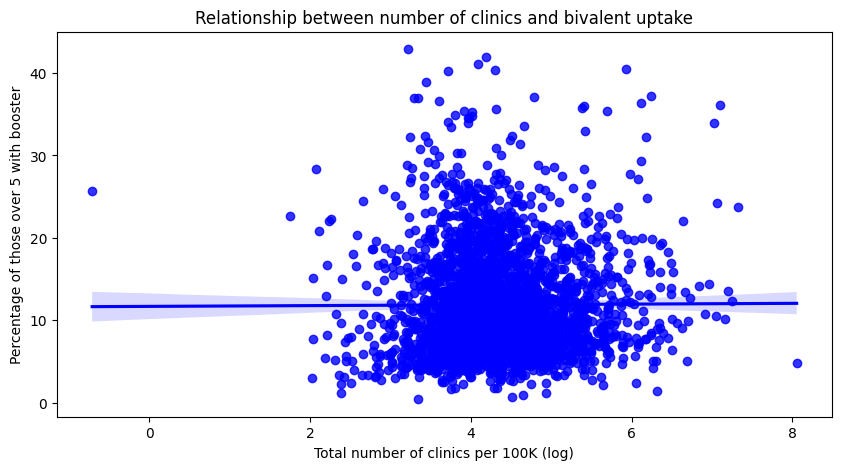

In [50]:
# graph the relationsip between clinics and bivalent uptake
## this figure does not account for any covariates

fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.regplot(data=merged_df, x="total_centers_log", y="bivalent_5plus_pct", color="Blue")
ax.set(
    xlabel="Total number of clinics per 100K (log)",
    ylabel="Percentage of those over 5 with booster",
)
ax.set(title="Relationship between number of clinics and bivalent uptake")

In [51]:
# how many counties do not have vaccine data?

final_df["bivalent_5plus_pct"].isnull().sum()

59

In [52]:
data_mapped = us_map.merge(final_df, on=["GEOID"])

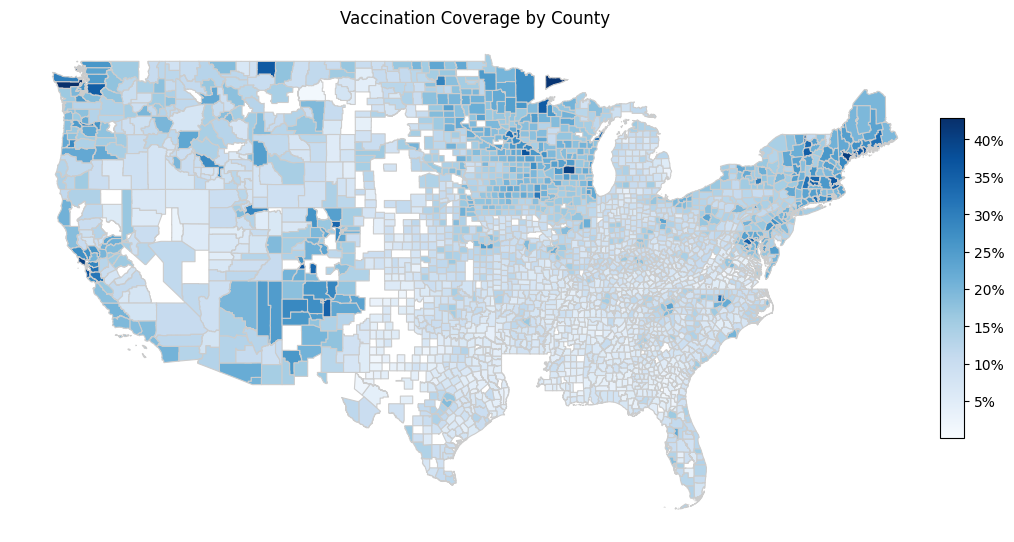

In [53]:
# plot the vaccination coverage on a map of the US

fig, ax = plt.subplots(figsize=(12,8))
data_mapped.plot(column='bivalent_5plus_pct', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

vmin, vmax = merged_df['bivalent_5plus_pct'].min(), merged_df['bivalent_5plus_pct'].max()
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar_ax = fig.add_axes([0.9, 0.3, 0.02, 0.4])
cbar = fig.colorbar(sm, cax=cbar_ax, format='%d%%')

ax.set_title("Vaccination Coverage by County")
ax.set_axis_off()


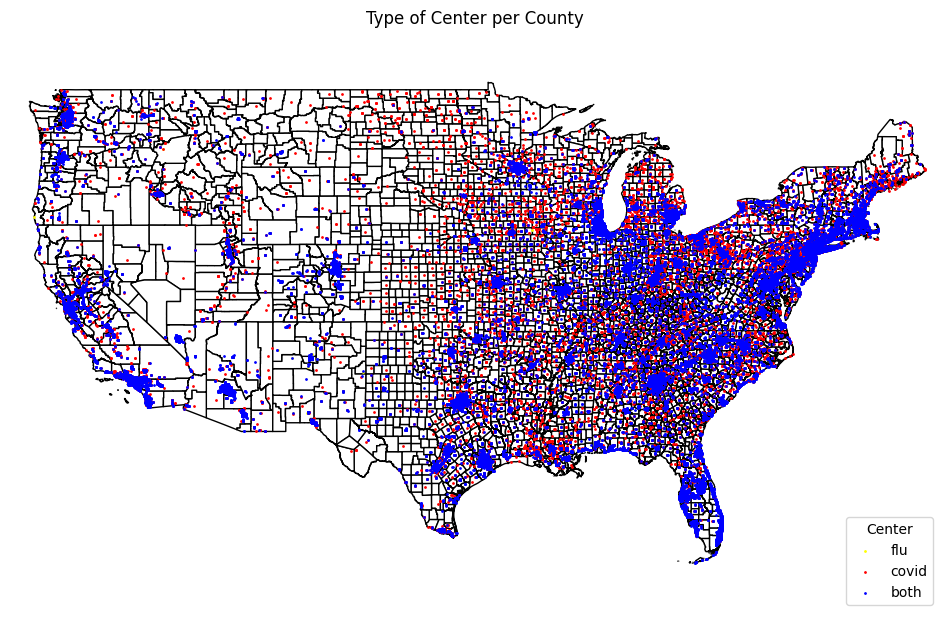

In [54]:
# plot flu, covid, both centers onto map

center_colors = {"flu": "yellow", "covid": "red", "both": "blue"}

ax = us_map.plot(color="white", edgecolor="black", figsize=(12, 8))
for center, color in center_colors.items():
    gdf[gdf["center"] == center].plot(ax=ax, color=color, markersize=1, label=center)

ax.legend(title="Center", loc="lower right")
ax.set_title("Type of Center per County")
ax.set_axis_off()

ax.set_xlim([-126, -66])
ax.set_ylim([22, 52])


plt.show()